In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import seaborn as sns
import tensorflow as tf
import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
import cv2
%matplotlib inline 

In [11]:
data = pd.read_pickle("./DataSignal.pkl")
data = data.loc[((data['Status'] == "OK")|(data['Status'] == "NOK"))]
#df_f40=data.loc[((data['Status'] == "OK")|(data['Status'] == "NOK"))&(data['Model'] == "F40")]

In [38]:
data.head()

,Messungid,Model,Door,Status,Closing speed,Penetration,Acc,Vel,Pos
0,1179308,F40,HL,OK,0.975537,2.258473,"[0.11184678071289063, 0.1156472873046875, 0.11...","[-0.981106881873418, -0.9811217440723506, -0.9...","[78.60432842518559, 78.50442167364837, 78.4045..."
1,1179311,F40,VL,OK,1.031965,2.345965,"[-0.16178969389648437, -0.1427871609375, -0.13...","[-1.0302631906068425, -1.0302753651956205, -1....","[80.77476790838206, 80.67131586395837, 80.5678..."
2,1179312,F40,VL,OK,0.928777,1.976692,"[-0.16178969389648437, -0.1427871609375, -0.13...","[-1.0302631906068425, -1.0302753651956205, -1....","[80.77476790838206, 80.67131586395837, 80.5678..."
3,1178960,F40,VL,OK,0.891585,2.418349,"[-0.15038817412109376, -0.16178969389648437, -...","[-0.8882949627356325, -0.8883167454088293, -0....","[70.12732703748269, 70.03703303982765, 69.9467..."
4,1179159,F87,VL,OK,0.912288,2.256927,"[0.13464982026367187, 0.1156472873046875, 0.11...","[-0.926761313881059, -0.9267974714515858, -0.9...","[73.27326237483051, 73.1806376568902, 73.08800..."


In [40]:
f_40_list = data.index[data['Model'] == "F40"].tolist()

In [ ]:
f_40_noklist=data.loc[(data['Status'] == "OK")&(data['Model'] == "F40")].tolist()

<AxesSubplot:xlabel='count', ylabel='Status'>

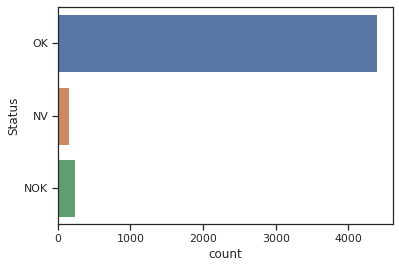

In [41]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='Status', data=data)

<AxesSubplot:xlabel='count', ylabel='Model'>

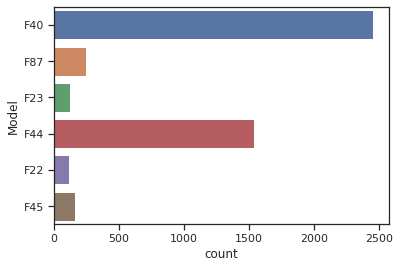

In [14]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='Model', data=data)


<AxesSubplot:xlabel='Model', ylabel='count'>

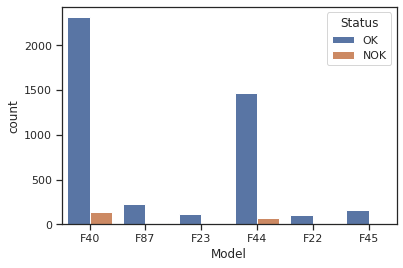

In [23]:
sns.set_style('ticks')
sns.countplot(x='Model', hue='Status', data=data)

<AxesSubplot:xlabel='count', ylabel='Status'>

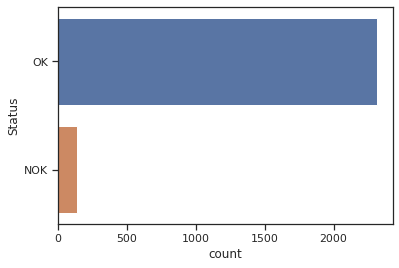

In [43]:
df_f40=data.loc[((data['Status'] == "OK")|(data['Status'] == "NOK"))&(data['Model'] == "F40")]

sns.set(style="ticks", color_codes=True)
sns.countplot(y='Status', data=df_f40)

<AxesSubplot:xlabel='count', ylabel='Status'>

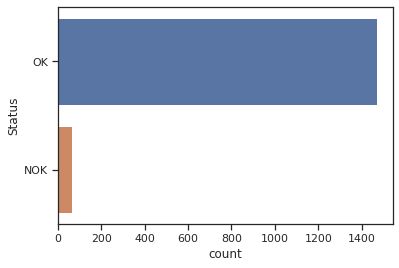

In [44]:
df_f44=data.loc[((data['Status'] == "OK")|(data['Status'] == "NOK"))&(data['Model'] == "F44")]

sns.set(style="ticks", color_codes=True)
sns.countplot(y='Status', data=df_f44)

<AxesSubplot:xlabel='count', ylabel='Status'>

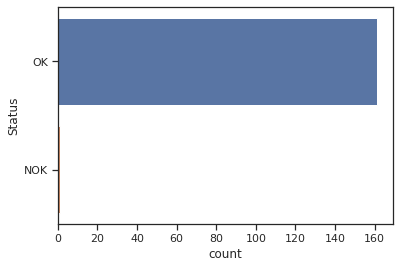

In [26]:
df_f45=data.loc[((data['Status'] == "OK")|(data['Status'] == "NOK"))&(data['Model'] == "F45")]

sns.set(style="ticks", color_codes=True)
sns.countplot(y='Status', data=df_f45)

In [27]:
def conv_array(array):
    result=[]
    for r in array:
        result.append(r)
    return np.asarray(result)
def cut_signals(arraylist):
    result=[]
    for a in arraylist:
        result.append(a[500:1500])    
    return result    
    
def graph_spectrogram(acc,N,T,fname):
 
    fs = N/T
    
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    
    pylab.specgram(acc, Fs=fs)
    pylab.savefig('./'+fname+'.png')
    pylab.show()

In [28]:
acc_signals=conv_array(data['Acc'])
vel_signals=conv_array(data['Vel'])
pos_signals=conv_array(data['Pos'])

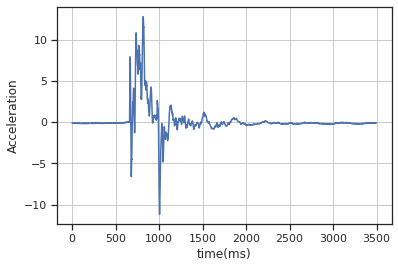

In [36]:
plt.plot(acc_signals[1])
plt.xlabel("time(ms)")
plt.ylabel("Acceleration")
plt.grid()

Text(0, 0.5, 'acc')

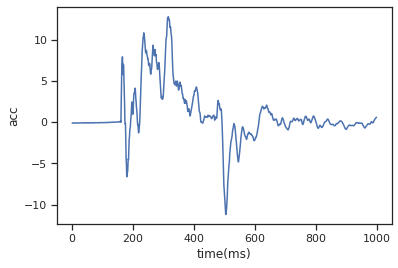

In [30]:
a_cut = acc_signals[1][500:1500]
plt.plot(a_cut)
plt.xlabel("time(ms)")
plt.ylabel("acc")

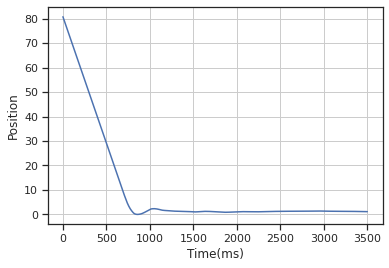

In [35]:
plt.plot(pos_signals[1])
plt.xlabel("Time(ms)")
plt.ylabel("Position")
plt.grid()

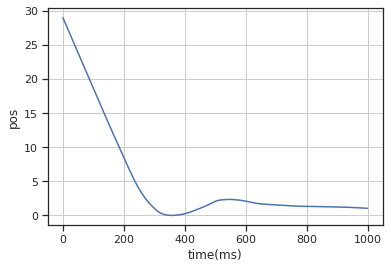

In [34]:
p_cut = pos_signals[1][500:1500]
plt.plot(p_cut)
plt.xlabel("time(ms)")
plt.ylabel("pos")
plt.grid()

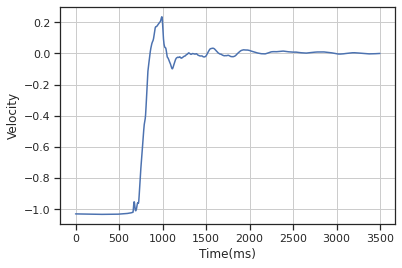

In [37]:
plt.plot(vel_signals[1])
plt.xlabel("Time(ms)")
plt.ylabel("Velocity")
plt.grid()

In [25]:
v_cut = pos_signals[1][500:1500]
plt.plot(v_cut)
plt.xlabel("time(ms)")
plt.ylabel("velocity")
plt.grid()

NameError: name 'pos_signals' is not defined

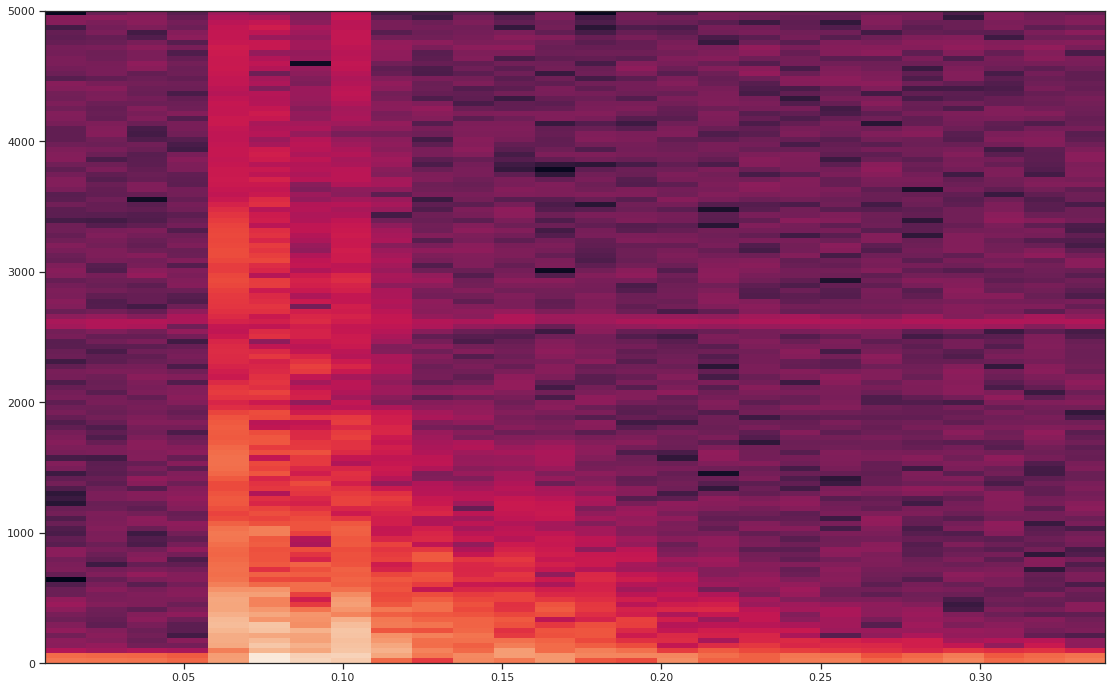

In [54]:
graph_spectrogram(acc_signals[1],3500,0.35,"spectrogram1")

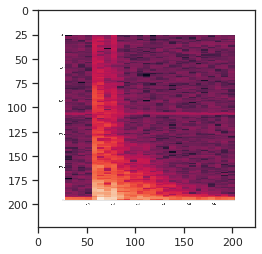

In [55]:
image=tf.keras.preprocessing.image.load_img("./spectrogram1.png", color_mode='rgb', 
target_size= (224,224))
image=np.array(image)
image_scaled = image/255

plt.imshow(image_scaled, interpolation='nearest')
plt.show()

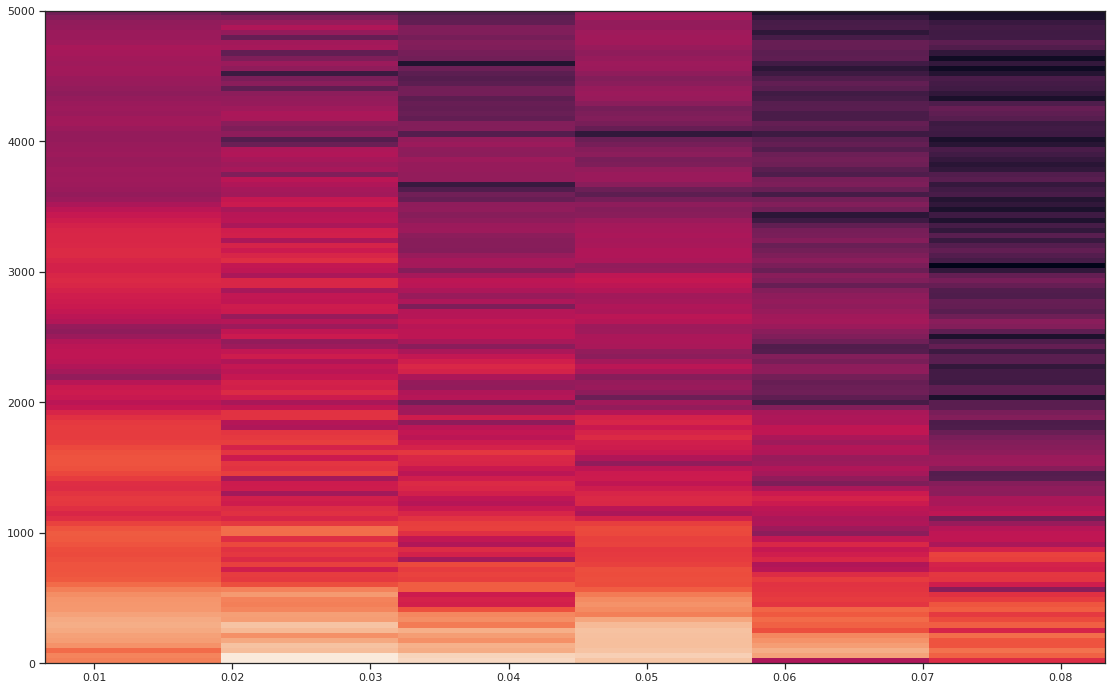

In [57]:
graph_spectrogram(acc_signals[1][500:1500],1000,0.1,"scaled_spect.png")

In [ ]:
acc_cut_signals = cut_signals(acc_signals)
vel_cut_signals = cut_signals(vel_signals)
pos_cut_signals = cut_signals(pos_signals)

In [ ]:
data['Acc_cut'] = acc_cut_signals
data['Vel_cut'] = vel_cut_signals
data['Pos_cut'] = pos_cut_signals
data.to_pickle("./Data_cut.pkl")

In [14]:
df_f40=data.loc[((data['Status'] == "OK")|(data['Status'] == "NOK"))&(data['Model'] == "F40")]
